<h1  style= "background-color: gray;
                 color:white;
            text-align: center; 
            font-family:Helvetica, Arial, verdana, sans-serif"> Analyse exploratoire </h1>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import warnings
import folium
import missingno as msno
import home_made_functions as hmf

warnings.filterwarnings("ignore")

import cufflinks as cf
import plotly.express as px
%matplotlib inline
# Make Plotly work in your Jupyter Notebook
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
# Use Plotly locally
cf.go_offline()

ModuleNotFoundError: No module named 'cufflinks'

## Contexte

academy est une edtech qui propose de contenus de formation en ligne de niveau lycée et université.

L'entreprise envisage une internationalisation et l'objectif de ce projet est analyser des données issues de la banque mondiale afin de déterminer les pays à fort potentiel.

Plan d'action :

1. Analyse des indicateurs
2. Consolider les données et selectionner les indicateurs pertinents
3. Analyser les indicateurs selectionnés
4. Déterminer les pays à fort potentiel


https://www.youtube.com/watch?v=GGL6U0k8WYA

*********************************** Data infos ***********************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3224 entries, 0 to 3223
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Region                               3224 non-null   object 
 1   Country Code                         3224 non-null   object 
 2   Country                              3224 non-null   object 
 3   Year                                 3224 non-null   int64  
 4   Income Group                         3224 non-null   object 
 5   Expenditure on education             3224 non-null   float64
 6   GDP per capita (current US$)         3224 non-null   float64
 7   Internet users (per 100 people)      3224 non-null   float64
 8   Personal computers (per 100 people)  3224 non-null   float64
 9   Population growth (annual %)         3224 non-null   float64
 10  Population, t

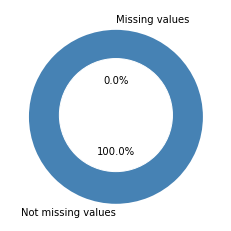

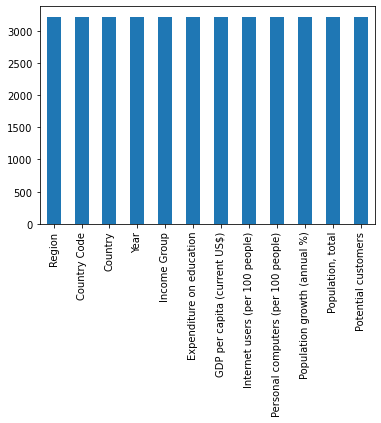

Nombre total de valeurs manquantes :  0


In [3]:
data_final = hmf.pd.read_csv('./data/df_final.csv')
hmf.describe_data(data_final)

## 1. Analyse des indicateurs

### 1.1. Home made Describe : Indicateurs statistiques des regions

In [4]:
# made home describe
indicators = data_final.columns[5:]

hmf.stats(data=data_final, region_col='Region', indicators=indicators)


 *************************************************************************** East Asia & Pacific ***************************************************************************


,Indicateur statistique,Expenditure on education,GDP per capita (current US$),Internet users (per 100 people),Personal computers (per 100 people),Population growth (annual %),"Population, total",Potential customers
0,mean,15.60,11787.21,27.87,22.46,1.10,6.469009e+07,6388847.20
1,median,15.66,3380.16,19.77,13.13,1.08,2.690470e+06,423496.28
2,std,3.74,15941.74,25.92,22.72,1.01,2.282525e+08,21059728.19
3,mode,5.29,138.92,7.00,-0.85,-3.59,1.274450e+08,11866.00
4,kurtosis,12.12,3.69,-0.63,-0.39,3.62,2.538000e+01,26.06



 *************************************************************************** Europe & Central Asia ***************************************************************************


,Indicateur statistique,Expenditure on education,GDP per capita (current US$),Internet users (per 100 people),Personal computers (per 100 people),Population growth (annual %),"Population, total",Potential customers
0,mean,13.08,26812.87,47.51,40.02,0.37,15672027.23,2102804.38
1,median,13.19,15765.63,49.44,37.75,0.31,5384853.00,798542.50
2,std,2.62,30029.71,28.04,28.51,0.92,26223506.38,3464233.34
3,mode,5.64,138.44,70.00,-0.78,-1.30,4440000.00,2996.00
4,kurtosis,-0.06,5.29,-1.15,-0.15,1.19,8.93,10.62



 *************************************************************************** Latin America & Caribbean ***************************************************************************


,Indicateur statistique,Expenditure on education,GDP per capita (current US$),Internet users (per 100 people),Personal computers (per 100 people),Population growth (annual %),"Population, total",Potential customers
0,mean,15.89,8387.21,26.51,18.47,1.05,16216798.26,2271293.45
1,median,15.49,5760.23,23.61,15.43,1.12,4094587.50,653346.95
2,std,2.95,8133.80,18.83,13.51,0.74,36321507.05,5171253.29
3,mode,4.96,329.78,30.00,0.15,-1.21,45374.00,3526.00
4,kurtosis,3.93,7.02,-0.47,-0.35,-0.22,14.25,19.10



 *************************************************************************** Middle East & North Africa ***************************************************************************


,Indicateur statistique,Expenditure on education,GDP per capita (current US$),Internet users (per 100 people),Personal computers (per 100 people),Population growth (annual %),"Population, total",Potential customers
0,mean,15.48,13633.64,27.54,21.97,3.05,17615204.99,2281240.61
1,median,15.39,5468.77,19.53,14.24,2.23,6629850.00,954028.72
2,std,4.05,16938.05,25.28,20.93,2.66,22719253.35,3109862.41
3,mode,5.50,535.83,20.00,0.20,0.35,390087.00,27957.00
4,kurtosis,2.50,4.89,-0.34,0.39,7.37,2.24,3.25



 *************************************************************************** North America ***************************************************************************


,Indicateur statistique,Expenditure on education,GDP per capita (current US$),Internet users (per 100 people),Personal computers (per 100 people),Population growth (annual %),"Population, total",Potential customers
0,mean,13.19,53745.92,70.63,71.79,0.78,1.166611e+08,16194853.34
1,median,12.93,49096.05,71.68,74.43,0.89,3.343717e+07,3596609.68
2,std,1.54,19186.19,12.79,15.92,0.40,1.378100e+08,19773338.21
3,mode,9.93,23691.59,80.30,22.30,-0.86,6.183300e+04,38843.93
4,kurtosis,0.17,-0.39,-0.32,0.77,10.03,-1.610000e+00,-1.58



 *************************************************************************** South Asia ***************************************************************************


,Indicateur statistique,Expenditure on education,GDP per capita (current US$),Internet users (per 100 people),Personal computers (per 100 people),Population growth (annual %),"Population, total",Potential customers
0,mean,15.19,1631.01,8.71,6.05,1.86,1.975962e+08,18878317.05
1,median,15.63,885.64,5.12,3.04,1.75,2.661679e+07,2715101.45
2,std,3.41,1915.75,10.61,7.31,0.93,3.824985e+08,39282688.60
3,mode,8.27,117.41,5.00,-0.74,-0.55,2.860000e+05,29427.00
4,kurtosis,0.53,5.91,4.78,3.05,1.49,3.120000e+00,4.88



 *************************************************************************** Sub-Saharan Africa ***************************************************************************


,Indicateur statistique,Expenditure on education,GDP per capita (current US$),Internet users (per 100 people),Personal computers (per 100 people),Population growth (annual %),"Population, total",Potential customers
0,mean,16.43,1869.57,6.67,4.83,2.55,17468181.29,1401294.35
1,median,15.96,674.60,2.89,2.15,2.68,10004451.00,664949.39
2,std,4.27,3085.55,9.57,6.56,0.89,26252656.20,2058942.21
3,mode,3.10,111.36,2.00,-1.33,-2.63,81131.00,9288.00
4,kurtosis,2.40,13.74,6.48,5.32,2.23,13.95,19.02


### 1.2. Visualisations des indicateurs par region

*************************  East Asia & Pacific  *************************

 Indicateur  Expenditure on education  



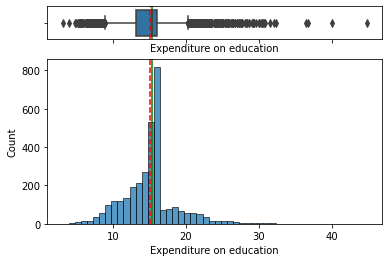

 Moyenne :  15.08
 Médiane :  15.35
 Écart-type :  3.71

 Indicateur  GDP per capita (current US$)  



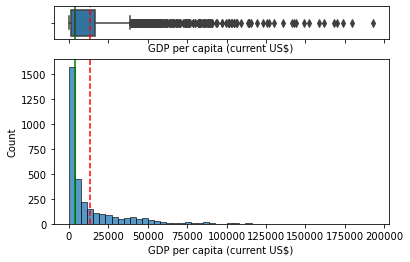

 Moyenne :  13491.27
 Médiane :  4138.85
 Écart-type :  21319.82

 Indicateur  Internet users (per 100 people)  



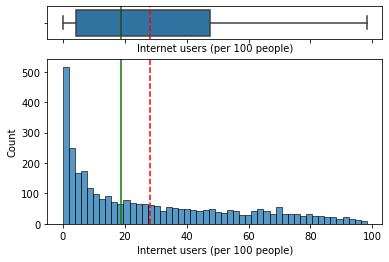

 Moyenne :  28.08
 Médiane :  18.9
 Écart-type :  27.08

 Indicateur  Personal computers (per 100 people)  



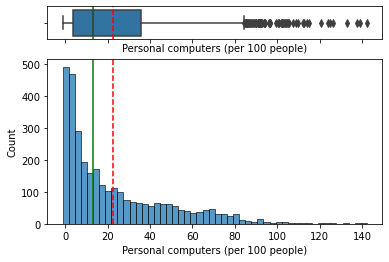

 Moyenne :  22.63
 Médiane :  13.17
 Écart-type :  24.64

 Indicateur  Population growth (annual %)  



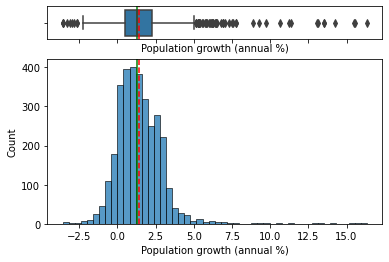

 Moyenne :  1.44
 Médiane :  1.27
 Écart-type :  1.53

 Indicateur  Population, total  



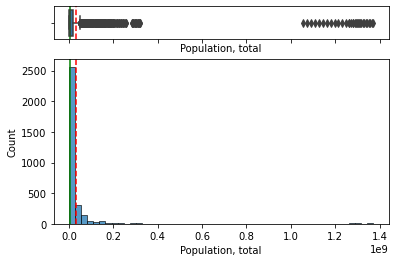

 Moyenne :  32946823.61
 Médiane :  5999080.0
 Écart-type :  128898501.24

 Indicateur  Potential customers  



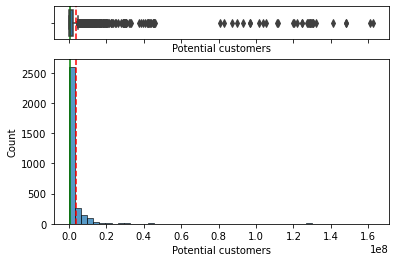

 Moyenne :  3547902.48
 Médiane :  735575.1
 Écart-type :  12754500.84


In [5]:
hmf.stats_viz(df=data_final, indicators=data_final.columns[5:], region_col='Region', region='East Asia & Pacific')

### 1.3. Visualisations des indicateurs par region pour une année spécifique

*************************  East Asia & Pacific  *************************

 Indicateur  Expenditure on education  



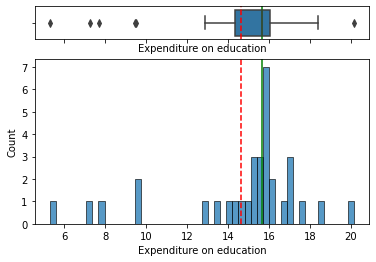

 Moyenne :  14.64
 Médiane :  15.67
 Écart-type :  3.26

 Indicateur  GDP per capita (current US$)  



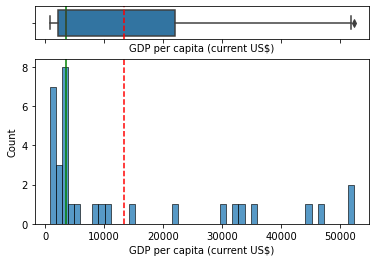

 Moyenne :  13414.79
 Médiane :  3548.07
 Écart-type :  16913.41

 Indicateur  Internet users (per 100 people)  



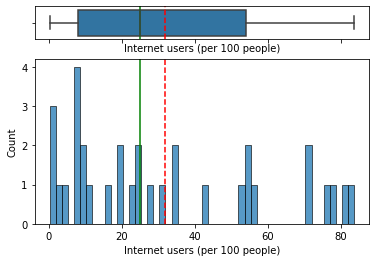

 Moyenne :  31.76
 Médiane :  25.0
 Écart-type :  27.11

 Indicateur  Personal computers (per 100 people)  



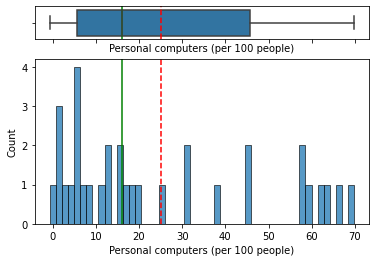

 Moyenne :  25.0
 Médiane :  15.98
 Écart-type :  23.21

 Indicateur  Population growth (annual %)  



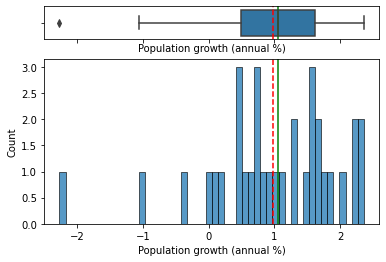

 Moyenne :  0.98
 Médiane :  1.05
 Écart-type :  0.99

 Indicateur  Population, total  



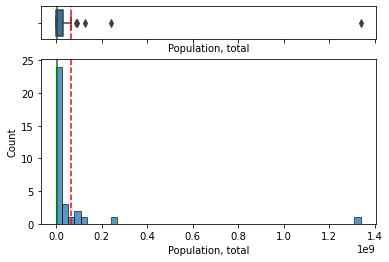

 Moyenne :  65374467.73
 Médiane :  2712650.0
 Écart-type :  233929934.96

 Indicateur  Potential customers  



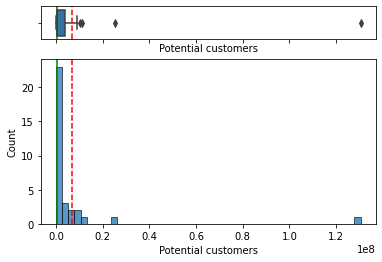

 Moyenne :  6740426.73
 Médiane :  458550.0
 Écart-type :  22794277.75


In [6]:
hmf.stats_region_year(df=data_final, indicators=indicators, region_col='Region', year_col='Year', region='East Asia & Pacific', year=2010)

## 4. Pays à fort potentiel

In [7]:
data_final.head()

,Region,Country Code,Country,Year,Income Group,Expenditure on education,GDP per capita (current US$),Internet users (per 100 people),Personal computers (per 100 people),Population growth (annual %),"Population, total",Potential customers
0,East Asia & Pacific,ASM,American Samoa,2002,Upper middle income,15.397179,8751.766529,26.023380,19.044292,0.951199,58731.0,302708.280565
1,East Asia & Pacific,ASM,American Samoa,2003,Upper middle income,15.370253,8914.525433,27.256721,19.844786,0.655083,59117.0,302746.408348
2,East Asia & Pacific,ASM,American Samoa,2004,Upper middle income,15.357394,8639.308855,28.547918,20.470555,0.248351,59264.0,302761.095310
3,East Asia & Pacific,ASM,American Samoa,2005,Upper middle income,15.331877,8508.406915,30.284170,21.425952,-0.246659,59118.0,302746.708218
4,East Asia & Pacific,ASM,American Samoa,2006,Upper middle income,15.299100,8456.947997,32.282248,22.572669,-0.794787,58650.0,302700.408588


In [8]:
potential = data_final.copy()



for indicator in indicators:
    splited = indicator.split(' ')
    col_name =''
    for elem in splited[:3]:
        col_name+= ' '
        col_name+=elem
    potential['Score {}'.format(col_name)] = potential[indicator]/potential[indicator].max()
potential.head()

,Region,Country Code,Country,Year,Income Group,Expenditure on education,GDP per capita (current US$),Internet users (per 100 people),Personal computers (per 100 people),Population growth (annual %),"Population, total",Potential customers,Score Expenditure on education,Score GDP per capita,Score Internet users (per,Score Personal computers (per,Score Population growth (annual,"Score Population, total",Score Potential customers
0,East Asia & Pacific,ASM,American Samoa,2002,Upper middle income,15.397179,8751.766529,26.023380,19.044292,0.951199,58731.0,302708.280565,0.343673,0.045348,0.265004,0.133820,0.058243,0.000043,0.001861
1,East Asia & Pacific,ASM,American Samoa,2003,Upper middle income,15.370253,8914.525433,27.256721,19.844786,0.655083,59117.0,302746.408348,0.343072,0.046192,0.277563,0.139444,0.040111,0.000043,0.001861
2,East Asia & Pacific,ASM,American Samoa,2004,Upper middle income,15.357394,8639.308855,28.547918,20.470555,0.248351,59264.0,302761.095310,0.342785,0.044766,0.290712,0.143841,0.015207,0.000043,0.001861
3,East Asia & Pacific,ASM,American Samoa,2005,Upper middle income,15.331877,8508.406915,30.284170,21.425952,-0.246659,59118.0,302746.708218,0.342216,0.044087,0.308393,0.150555,-0.015103,0.000043,0.001861
4,East Asia & Pacific,ASM,American Samoa,2006,Upper middle income,15.299100,8456.947997,32.282248,22.572669,-0.794787,58650.0,302700.408588,0.341484,0.043821,0.328740,0.158613,-0.048665,0.000043,0.001861


In [9]:
nb_scores = len(potential.columns[potential.columns.str.contains('Score')].tolist())
nb_scores

7

In [10]:
potential.head()

,Region,Country Code,Country,Year,Income Group,Expenditure on education,GDP per capita (current US$),Internet users (per 100 people),Personal computers (per 100 people),Population growth (annual %),"Population, total",Potential customers,Score Expenditure on education,Score GDP per capita,Score Internet users (per,Score Personal computers (per,Score Population growth (annual,"Score Population, total",Score Potential customers
0,East Asia & Pacific,ASM,American Samoa,2002,Upper middle income,15.397179,8751.766529,26.023380,19.044292,0.951199,58731.0,302708.280565,0.343673,0.045348,0.265004,0.133820,0.058243,0.000043,0.001861
1,East Asia & Pacific,ASM,American Samoa,2003,Upper middle income,15.370253,8914.525433,27.256721,19.844786,0.655083,59117.0,302746.408348,0.343072,0.046192,0.277563,0.139444,0.040111,0.000043,0.001861
2,East Asia & Pacific,ASM,American Samoa,2004,Upper middle income,15.357394,8639.308855,28.547918,20.470555,0.248351,59264.0,302761.095310,0.342785,0.044766,0.290712,0.143841,0.015207,0.000043,0.001861
3,East Asia & Pacific,ASM,American Samoa,2005,Upper middle income,15.331877,8508.406915,30.284170,21.425952,-0.246659,59118.0,302746.708218,0.342216,0.044087,0.308393,0.150555,-0.015103,0.000043,0.001861
4,East Asia & Pacific,ASM,American Samoa,2006,Upper middle income,15.299100,8456.947997,32.282248,22.572669,-0.794787,58650.0,302700.408588,0.341484,0.043821,0.328740,0.158613,-0.048665,0.000043,0.001861


In [11]:
potential['Potential score'] = (potential['Score  Expenditure on education'] + potential['Score  GDP per capita'] + 1.2*potential['Score  Internet users (per'] + potential['Score  Population growth (annual'] + potential['Score  Population, total'] + 1.8*potential['Score  Potential customers'])/(nb_scores+1)

relevant_years = [2015, 2014,2013,2012,2011,2010]

top25_scores = potential[potential['Year'].isin(relevant_years)].groupby(['Region','Country','Country Code','Income Group']).mean().sort_values('Potential score', ascending=False).head(25).round(2)[['Potential score']].reset_index()
top25_scores

,Region,Country,Country Code,Income Group,Potential score
0,East Asia & Pacific,China,CHN,Upper middle income,0.40
1,South Asia,India,IND,Lower middle income,0.39
2,North America,United States,USA,High income: OECD,0.28
3,Europe & Central Asia,Liechtenstein,LIE,High income: nonOECD,0.27
4,Middle East & North Africa,Qatar,QAT,High income: nonOECD,0.27
5,Europe & Central Asia,Luxembourg,LUX,High income: OECD,0.26
6,Europe & Central Asia,Norway,NOR,High income: OECD,0.26
7,Europe & Central Asia,Monaco,MCO,High income: nonOECD,0.25
8,Europe & Central Asia,Switzerland,CHE,High income: OECD,0.24
9,Europe & Central Asia,Sweden,SWE,High income: OECD,0.23


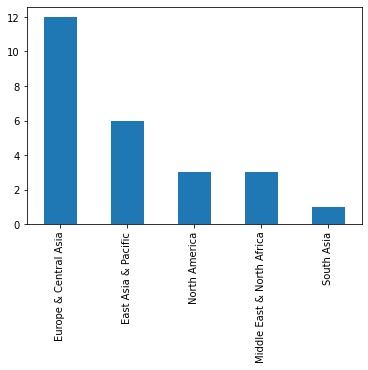

In [12]:
top25_scores.Region.value_counts().plot(kind='bar')
plt.show()

In [13]:
import plotly.graph_objects as go
import plotly.offline as pyo

scores = pd.concat([potential['Country'],potential.iloc[:,12:]], axis=1).groupby('Country').mean().reset_index().round(2)
fig = go.Figure(
    data=[
        go.Scatterpolar(r= scores[scores.Country=='China'].iloc[:,1:].values[0],theta = scores.iloc[:,1:].columns,fill = 'toself',name='China'),
        go.Scatterpolar(r= scores[scores.Country=='India'].iloc[:,1:].values[0],theta = scores.iloc[:,1:].columns,fill = 'toself',name='India'),
        go.Scatterpolar(r= scores[scores.Country=='Liechtenstein'].iloc[:,1:].values[0],theta = scores.iloc[:,1:].columns,fill = 'toself',name='Liechtenstein'),
        #go.Scatterpolar(r= scores[scores.Country=='Luxembourg'].iloc[:,1:].values[0],theta = scores.iloc[:,1:].columns,fill = 'toself',name='Luxembourg'),
        #go.Scatterpolar(r= scores[scores.Country=='Norway'].iloc[:,1:].values[0],theta = scores.iloc[:,1:].columns,fill = 'toself',name='Norway'),
        go.Scatterpolar(r= scores[scores.Country=='Qatar'].iloc[:,1:].values[0],theta = scores.iloc[:,1:].columns,fill = 'toself',name='Qatar'),
        go.Scatterpolar(r= scores[scores.Country=='United States'].iloc[:,1:].values[0],theta = scores.iloc[:,1:].columns,fill = 'toself',name='USA')
    ],
    layout=go.Layout(
        title=go.layout.Title(text='Top 5 Countries scores comparison', x=0.5 ),
        polar={'radialaxis': {'visible': True}},
        showlegend=True,
       
    )
)
iplot(fig)

NameError: name 'iplot' is not defined

In [ ]:
import geopandas

In [14]:
# On importe les données géographique des pays 
shape_file = geopandas.read_file('./data/countries.geojson')

# On récupère et prépare les colonnes pertinentes...
shape_file=shape_file[['ISO_A3', 'geometry']]
shape_file.rename(columns={'ISO_A3':'Country Code'}, inplace=True)

# On mere ces données au data_final
top25_scores_geo = shape_file.merge(top25_scores, on=['Country Code'], how='inner')
#top25_scores_geo = round(top_countries_geo,2)

# On affiche la map avec .explore()
top25_scores_geo.explore(column='Country', legend=True, color='Potential score',
                       tooltip=['Country', 'Region','Income Group','Potential score'])

NameError: name 'geopandas' is not defined

In [15]:
top25_scores_geo

NameError: name 'top25_scores_geo' is not defined

## 3. Evolution de 'Potential score' par region

East Asia & Pacific


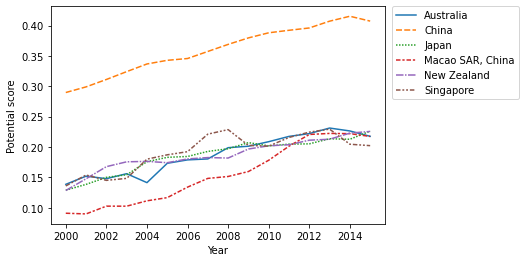

Europe & Central Asia


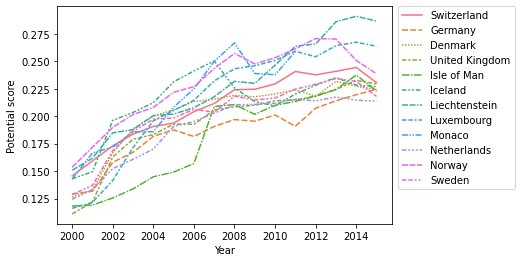

Middle East & North Africa


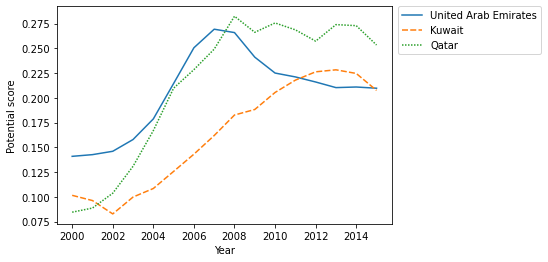

North America


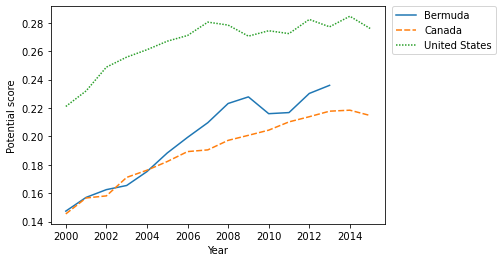

South Asia


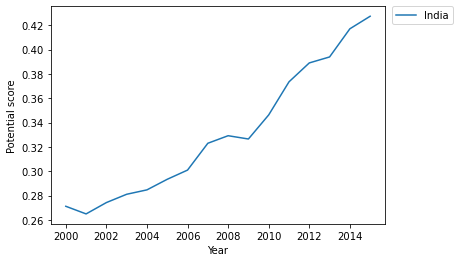

In [16]:
evolution = potential[potential['Country'].isin(top25_scores['Country'])]

for region in evolution['Region'].unique():
    evol = evolution[evolution['Region']==region]
    print(region)
    sns.lineplot(data=evol, x='Year', y='Potential score', hue='Country', style='Country')
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    plt.show()